In [1]:
import numpy as np# Importing every library we need

In [2]:
import seaborn as sns

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("data0.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'data0.csv'

In [ ]:
df.head()

,Market Place,Crop Variety,Producer Min,Producer Max,Wholesale Min,Wholesale Max,Retail Min,Retail Max,Volume,Collection Date
0,Bahir Dar kebele 04,White Teff (Quintal),0,0.0,2400,2500,2550.0,2650,Sufficient,5/2/2019
1,Hawassa,White Teff (Quintal),0,0.0,2700,2900,2800.0,3000,Under,5/6/2019
2,Humera,White Teff (Quintal),0,0.0,2800,2900,0.0,0,Sufficient,5/8/2019
3,Bahir Dar kebele 04,White Teff (Quintal),0,0.0,2450,2550,2550.0,2700,Sufficient,5/9/2019
4,Hawassa,White Teff (Quintal),0,0.0,2700,2900,2800.0,3000,Under,5/13/2019


In [ ]:
df.tail()

,Market Place,Crop Variety,Producer Min,Producer Max,Wholesale Min,Wholesale Max,Retail Min,Retail Max,Volume,Collection Date
1014,Bahir Dar kebele 04,White Teff (Quintal),0,0.0,0,0,6500.0,6800,Sufficient,3/2/2023
1015,Dilla,White Teff (Quintal),0,0.0,6700,6800,6800.0,7000,Sufficient,3/4/2023
1016,Woldia Gebeya,White Teff (Quintal),6808,6956.0,0,0,6956.0,7106,Sufficient,3/7/2023
1017,Bahir Dar kebele 04,White Teff (Quintal),0,0.0,6200,6500,6500.0,7000,Sufficient,3/9/2023
1018,Adama City,White Teff (Quintal),0,0.0,7200,7300,7400.0,7500,Sufficient,3/10/2023


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1019 entries, 0 to 1018
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Market Place     1019 non-null   object 
 1   Crop Variety     1019 non-null   object 
 2   Producer Min     1019 non-null   int64  
 3   Producer Max     1019 non-null   float64
 4   Wholesale Min    1019 non-null   int64  
 5   Wholesale Max    1019 non-null   int64  
 6   Retail Min       1019 non-null   float64
 7   Retail Max       1019 non-null   int64  
 8   Volume           1019 non-null   object 
 9   Collection Date  1019 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 79.7+ KB


In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isnull().sum()

Market Place       0
Crop Variety       0
Producer Min       0
Producer Max       0
Wholesale Min      0
Wholesale Max      0
Retail Min         0
Retail Max         0
Volume             0
Collection Date    0
dtype: int64

In [ ]:
data2=df.copy()

In [ ]:
data2 = data2.dropna()

In [ ]:
data2.isnull().sum()

Market Place       0
Crop Variety       0
Producer Min       0
Producer Max       0
Wholesale Min      0
Wholesale Max      0
Retail Min         0
Retail Max         0
Volume             0
Collection Date    0
dtype: int64

In [ ]:
data2 = data2.drop('Retail Min', 1)

C:\Users\user\AppData\Local\Temp\ipykernel_20248\3544963172.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data2 = data2.drop('Retail Min', 1)


In [ ]:
data2 = data2.drop('Wholesale Max', 1)

C:\Users\user\AppData\Local\Temp\ipykernel_20248\3625768526.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data2 = data2.drop('Wholesale Max', 1)


In [ ]:
data2 = data2.drop('Wholesale Min', 1)

C:\Users\user\AppData\Local\Temp\ipykernel_20248\1643169034.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data2 = data2.drop('Wholesale Min', 1)


In [ ]:
data2 = data2.drop('Producer Max', 1)

C:\Users\user\AppData\Local\Temp\ipykernel_20248\1909392735.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data2 = data2.drop('Producer Max', 1)


In [ ]:
data2 = data2.drop('Producer Min', 1)

C:\Users\user\AppData\Local\Temp\ipykernel_20248\3150962837.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data2 = data2.drop('Producer Min', 1)


In [ ]:
data2.head()

,Market Place,Crop Variety,Retail Max,Volume,Collection Date
0,Bahir Dar kebele 04,White Teff (Quintal),2650,Sufficient,5/2/2019
1,Hawassa,White Teff (Quintal),3000,Under,5/6/2019
2,Humera,White Teff (Quintal),0,Sufficient,5/8/2019
3,Bahir Dar kebele 04,White Teff (Quintal),2700,Sufficient,5/9/2019
4,Hawassa,White Teff (Quintal),3000,Under,5/13/2019


In [ ]:
data2["Collection Date"][4]

'5/13/2019'

In [ ]:
data2["Collection Date"].value_counts()

9/25/2019     6
12/24/2020    4
8/22/2020     3
12/28/2019    3
1/12/2023     3
             ..
8/18/2020     1
8/17/2020     1
8/12/2020     1
8/11/2020     1
3/10/2023     1
Name: Collection Date, Length: 686, dtype: int64

In [ ]:
str = data2["Collection Date"][1]#taking any arbitrary data spliting it by calling split methode
str2 = str.split()#spliting it to 5,/,1,/,2019   thus str[6] out of range 
print(str)
print(str2)
print(str[0])

5/6/2019
['5/6/2019']
5


In [ ]:
#creating dictionary to store the months in
Dict = {1 :"January", 2:"February", 3:"March", 4:"April", 5:"May", 6:"June", 7:"July", 8:"August", 9:"September", 10:"October", 11:"November", 12:"December"}
print(Dict)

{1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}


In [ ]:
Dict[3]

'March'

In [ ]:
month = []#creating empty column

In [ ]:
for rr in data2["Collection Date"]:
    str = rr
    str2 = str.split('/')
    month.append(Dict[int(str2[0])])#taking the first term, (month) from the splited

In [ ]:
len(month)

1019

In [ ]:
data2["month"] = month

In [ ]:
data2["month"]

0         May
1         May
2         May
3         May
4         May
        ...  
1014    March
1015    March
1016    March
1017    March
1018    March
Name: month, Length: 1019, dtype: object

In [ ]:
data2["month"].unique()

array(['May', 'June', 'July', 'August', 'September', 'October',
       'November', 'December', 'January', 'February', 'March', 'April'],
      dtype=object)

In [ ]:
season =[]#creating empty column of season

In [ ]:
for tt in data2["month"]:
    if tt== "December" or tt=="January" or tt=="February":
        season.append("Winter")
    elif tt=="March" or tt=="April" or tt== "May":
            season.append("Autumn")
    elif tt=="June" or tt=="July" or tt == "August":
            season.append("Summer")
    elif tt=="September" or tt=="October" or tt== "November":
            season.append("Spring")

In [ ]:
len(season)

1019

In [ ]:
data2["season"] = season

In [ ]:
data2["season"]

0       Autumn
1       Autumn
2       Autumn
3       Autumn
4       Autumn
         ...  
1014    Autumn
1015    Autumn
1016    Autumn
1017    Autumn
1018    Autumn
Name: season, Length: 1019, dtype: object

In [ ]:
import pandas as pd 
df = pd.Timestamp("5/3/2023")
print(df.dayofweek)# will give each day like 0 = monday, 1=tuesday....

2


In [ ]:
day_of_week = []

In [ ]:
for rr in data2["Collection Date"]:#finding out value of each date and craating day column
    str = rr
    df = pd.Timestamp(rr)
    day = df.dayofweek
    day_of_week.append(day)

In [ ]:
len(day_of_week)

1019

In [ ]:
data2["day"]=day_of_week # putting the created day column to the data

In [ ]:
data2.head()

,Market Place,Crop Variety,Retail Max,Volume,Collection Date,month,season,day
0,Bahir Dar kebele 04,White Teff (Quintal),2650,Sufficient,5/2/2019,May,Autumn,3
1,Hawassa,White Teff (Quintal),3000,Under,5/6/2019,May,Autumn,0
2,Humera,White Teff (Quintal),0,Sufficient,5/8/2019,May,Autumn,2
3,Bahir Dar kebele 04,White Teff (Quintal),2700,Sufficient,5/9/2019,May,Autumn,3
4,Hawassa,White Teff (Quintal),3000,Under,5/13/2019,May,Autumn,0


In [ ]:
data1 = data2.copy()

In [ ]:
data2 = data2.drop('Collection Date', 1) #delating the column collection date not necessary any more

C:\Users\user\AppData\Local\Temp\ipykernel_20248\2882594863.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data2 = data2.drop('Collection Date', 1) #delating the column collection date not necessary any more


In [ ]:
data2.head()

,Market Place,Crop Variety,Retail Max,Volume,month,season,day
0,Bahir Dar kebele 04,White Teff (Quintal),2650,Sufficient,May,Autumn,3
1,Hawassa,White Teff (Quintal),3000,Under,May,Autumn,0
2,Humera,White Teff (Quintal),0,Sufficient,May,Autumn,2
3,Bahir Dar kebele 04,White Teff (Quintal),2700,Sufficient,May,Autumn,3
4,Hawassa,White Teff (Quintal),3000,Under,May,Autumn,0


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Retail Max'>

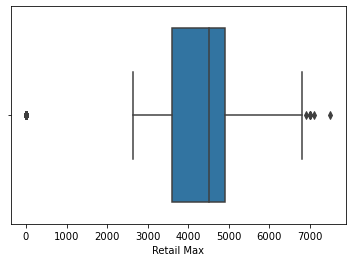

In [ ]:
import seaborn as sns
sns.boxplot(data2['Retail Max'])# look if there are out layers and remove them

# Removing out layers of Retail Max price 25%<values<75% out of this range

In [ ]:
#IQR
Q1=np.percentile(data2['Retail Max'], 25,interpolation="midpoint")
Q3=np.percentile(data2['Retail Max'], 75,interpolation="midpoint")
IQR=Q3-Q1

In [ ]:
#Upper bound
upper=np.where(data2['Retail Max']>=(Q3+1.5*IQR))
#Lower bound
lower=np.where(data2['Retail Max']<=(Q1-1.5*IQR))


In [ ]:
print(upper[0],lower[0])

[1009 1011 1013 1015 1016 1017 1018] [  2   5   8  12  16  19  22  25  29  33  37  40  43  47  54  60  65  69
  70  71  72  73  74  80  84  88  91  97 102 112 119 126 133 140 148 155
 162 168 175 181 188 195 203 210 218 227 235 241 245 250 255 259 265 272
 280 288 296 303 311 317 324 332 337 342 350 357 364 372 380 387 395 401
 409 416 422 429 435 442]


In [ ]:
#...Removing the outliers...
data2.drop(upper[0], inplace=True)
data2.drop(lower[0], inplace=True)

print("New Shape: ", data2.shape)

New Shape:  (934, 7)


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Retail Max'>

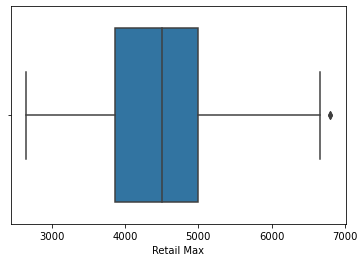

In [ ]:
sns.boxplot(data2['Retail Max'])

# Graphical Analysis

<IPython.core.display.Javascript object>

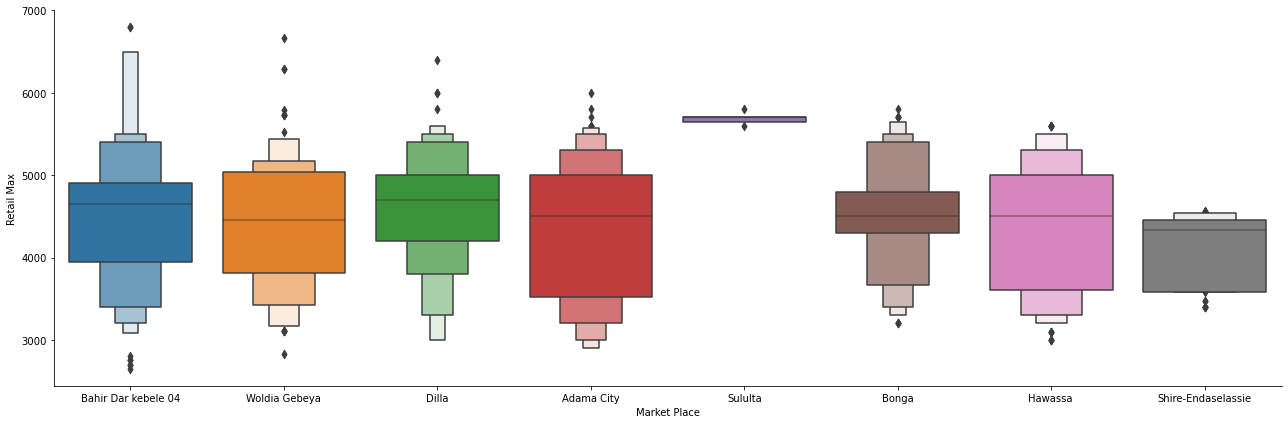

In [ ]:
# market place  vs retail max
sns.catplot(y = "Retail Max", x = "Market Place", data = data2.sort_values("Retail Max", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

<IPython.core.display.Javascript object>

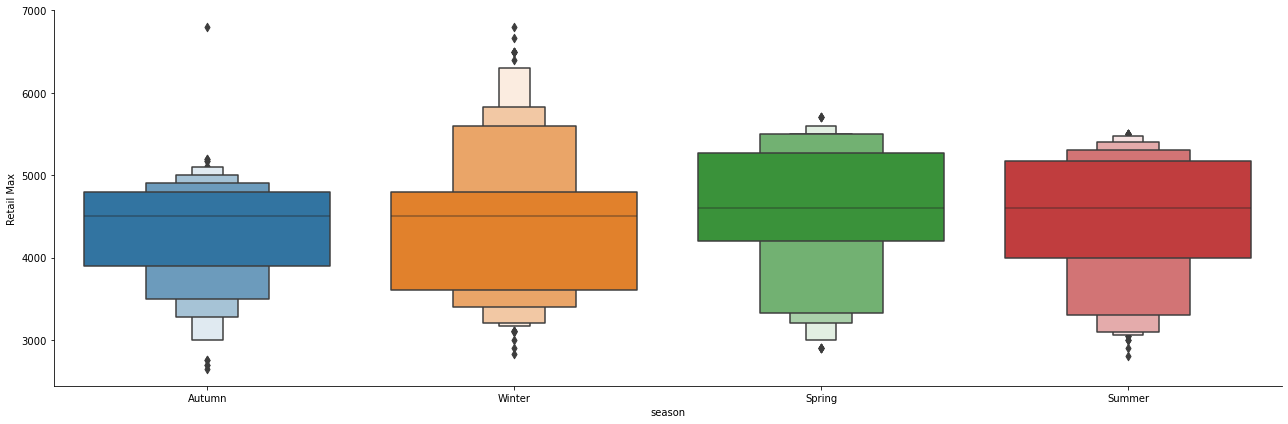

In [ ]:
# market place  vs retail max
sns.catplot(y = "Retail Max", x = "season", data = data2.sort_values("Retail Max", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

<IPython.core.display.Javascript object>

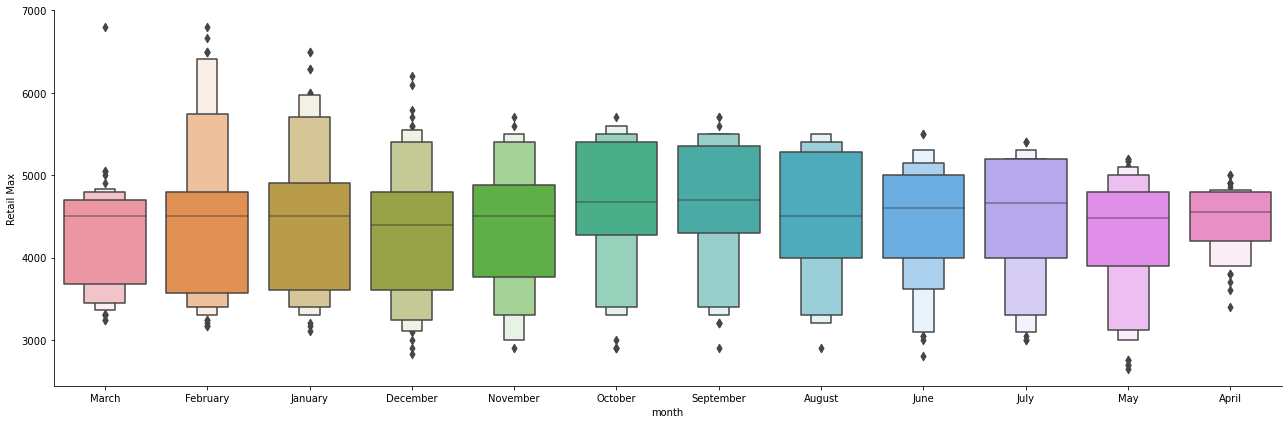

In [ ]:
# market place  vs retail max
sns.catplot(y = "Retail Max", x = "month", data = data2.sort_values("Retail Max", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

<IPython.core.display.Javascript object>

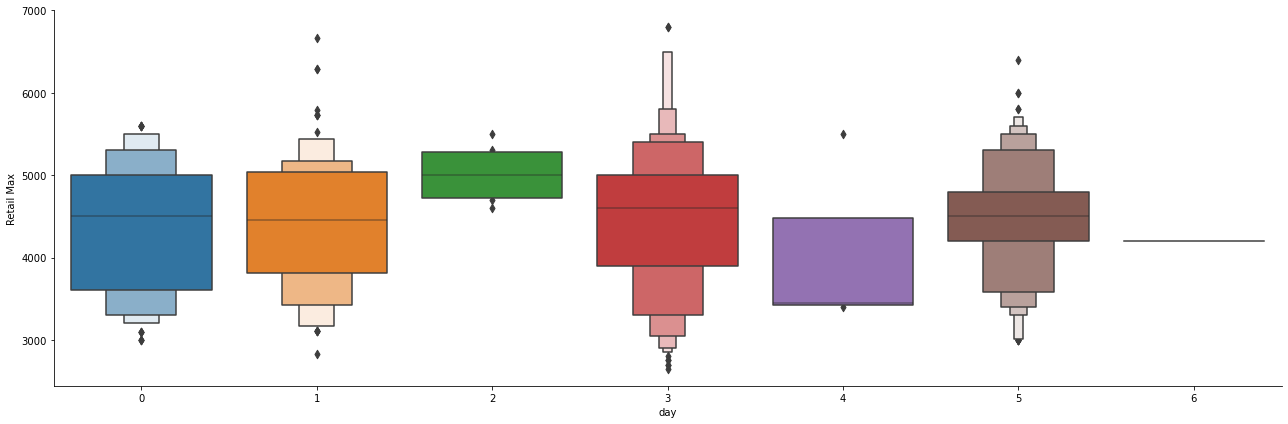

In [ ]:
# market place  vs retail max
sns.catplot(y = "Retail Max", x = "day", data = data2.sort_values("Retail Max", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

<IPython.core.display.Javascript object>

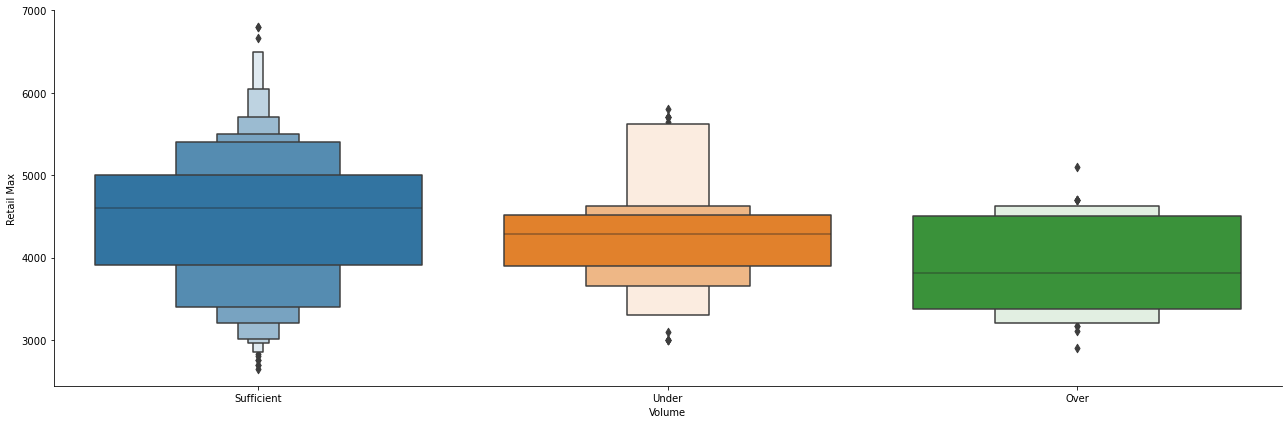

In [ ]:
# market place  vs retail max
sns.catplot(y = "Retail Max", x = "Volume", data = data2.sort_values("Retail Max", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [ ]:
data2.head()

,Market Place,Crop Variety,Retail Max,Volume,month,season,day
0,Bahir Dar kebele 04,White Teff (Quintal),2650,Sufficient,May,Autumn,3
1,Hawassa,White Teff (Quintal),3000,Under,May,Autumn,0
3,Bahir Dar kebele 04,White Teff (Quintal),2700,Sufficient,May,Autumn,3
4,Hawassa,White Teff (Quintal),3000,Under,May,Autumn,0
6,Bahir Dar kebele 04,White Teff (Quintal),2700,Sufficient,May,Autumn,3


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934 entries, 0 to 1014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Market Place  934 non-null    object
 1   Crop Variety  934 non-null    object
 2   Retail Max    934 non-null    int64 
 3   Volume        934 non-null    object
 4   month         934 non-null    object
 5   season        934 non-null    object
 6   day           934 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 58.4+ KB


# Changing the object data types in to numeric values using oneHotEncoding technique

In [ ]:
# As market place is Nominal Categorical data we will perform OneHotEncoding

Market_Place = data2[["Market Place"]]

Market_Place = pd.get_dummies(Market_Place, drop_first= True)

Market_Place.head()

,Market Place_Bahir Dar kebele 04,Market Place_Bonga,Market Place_Dilla,Market Place_Hawassa,Market Place_Shire-Endaselassie,Market Place_Sululta,Market Place_Woldia Gebeya
0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0
6,1,0,0,0,0,0,0


In [ ]:
# As crop variety is Nominal Categorical data we will perform OneHotEncoding

Crop_Variety = data2[["Crop Variety"]]

Crop_Variety = pd.get_dummies(Crop_Variety, drop_first= True)

Crop_Variety.head()

""
0
1
3
4
6


In [ ]:
# As volume is Nominal Categorical data we will perform OneHotEncoding

Volume = data2[["Volume"]]

Volume = pd.get_dummies(Volume, drop_first= True)

Volume.head()

,Volume_Sufficient,Volume_Under
0,1,0
1,0,1
3,1,0
4,0,1
6,1,0


In [ ]:
# As season is Nominal Categorical data we will perform OneHotEncoding

season = data2[["season"]]

season = pd.get_dummies(season, drop_first= True)

season.head(10)# the rest for the upsent == autumn

,season_Spring,season_Summer,season_Winter
0,0,0,0
1,0,0,0
3,0,0,0
4,0,0,0
6,0,0,0
7,0,0,0
9,0,0,0
10,0,0,0
11,0,0,0
13,0,0,0


In [ ]:
# As month is Nominal Categorical data we will perform OneHotEncoding

month = data2[["month"]]

month = pd.get_dummies(month, drop_first= True)

month.head()# 

,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
data0 = data2.copy()

#concatenation of the columns to the data

In [ ]:
data = pd.concat([data2, Market_Place, Crop_Variety, Volume, season, month ], axis = 1)

In [ ]:
data.head()

,Market Place,Crop Variety,Retail Max,Volume,month,season,day,Market Place_Bahir Dar kebele 04,Market Place_Bonga,Market Place_Dilla,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,Bahir Dar kebele 04,White Teff (Quintal),2650,Sufficient,May,Autumn,3,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,Hawassa,White Teff (Quintal),3000,Under,May,Autumn,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,Bahir Dar kebele 04,White Teff (Quintal),2700,Sufficient,May,Autumn,3,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,Hawassa,White Teff (Quintal),3000,Under,May,Autumn,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,Bahir Dar kebele 04,White Teff (Quintal),2700,Sufficient,May,Autumn,3,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
datas = data.copy()

# delating the oneHotEncoded columns

In [ ]:
data.drop(["Market Place", "Crop Variety", "Volume", "season", "month"], axis = 1, inplace = True)

In [ ]:
data.head()

,Retail Max,day,Market Place_Bahir Dar kebele 04,Market Place_Bonga,Market Place_Dilla,Market Place_Hawassa,Market Place_Shire-Endaselassie,Market Place_Sululta,Market Place_Woldia Gebeya,Volume_Sufficient,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,2650,3,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,3000,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2700,3,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,3000,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,2700,3,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


# splitting the data in  to train and test data 

In [ ]:
data.columns

Index(['Retail Max', 'day', 'Market Place_Bahir Dar kebele 04',
       'Market Place_Bonga', 'Market Place_Dilla', 'Market Place_Hawassa ',
       'Market Place_Shire-Endaselassie', 'Market Place_Sululta',
       'Market Place_Woldia Gebeya', 'Volume_Sufficient', 'Volume_Under',
       'season_Spring', 'season_Summer', 'season_Winter', 'month_August',
       'month_December', 'month_February', 'month_January', 'month_July',
       'month_June', 'month_March', 'month_May', 'month_November',
       'month_October', 'month_September'],
      dtype='object')

In [ ]:
features = data.loc[:,['day', 'Market Place_Bahir Dar kebele 04',
       'Market Place_Bonga', 'Market Place_Dilla', 'Market Place_Hawassa ',
       'Market Place_Shire-Endaselassie', 'Market Place_Sululta',
       'Market Place_Woldia Gebeya', 'Volume_Sufficient', 'Volume_Under',
       'season_Spring', 'season_Summer', 'season_Winter', 'month_August',
       'month_December', 'month_February', 'month_January', 'month_July',
       'month_June', 'month_March', 'month_May', 'month_November',
       'month_October', 'month_September']]

In [ ]:
features.head()

,day,Market Place_Bahir Dar kebele 04,Market Place_Bonga,Market Place_Dilla,Market Place_Hawassa,Market Place_Shire-Endaselassie,Market Place_Sululta,Market Place_Woldia Gebeya,Volume_Sufficient,Volume_Under,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,3,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,3,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
6,3,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
labels = data.loc[:,'Retail Max']

In [ ]:
labels.head()

0    2650
1    3000
3    2700
4    3000
6    2700
Name: Retail Max, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

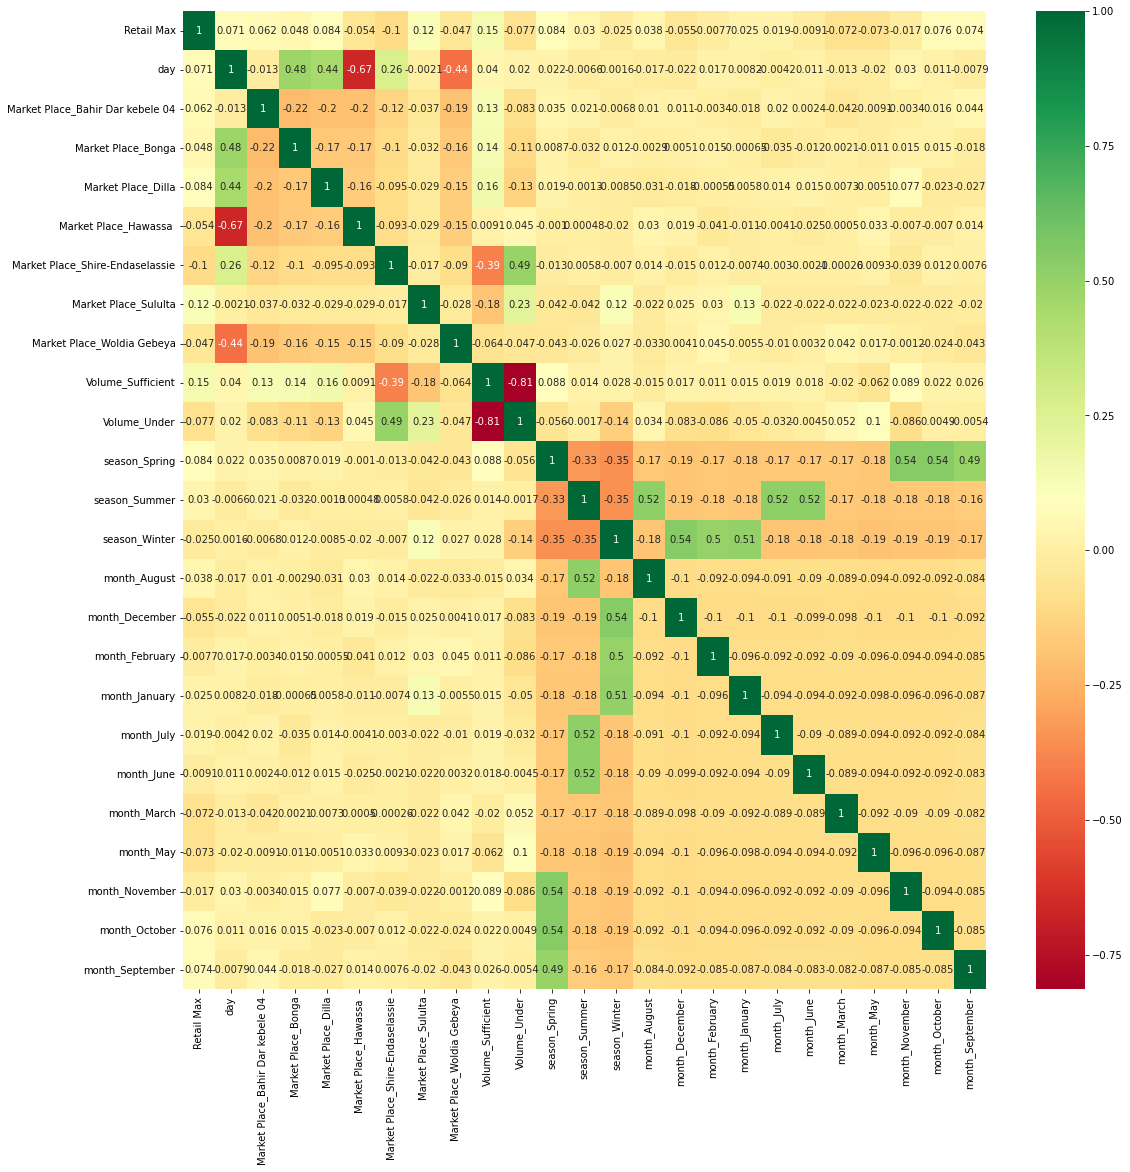

In [ ]:
#
plt.figure(figsize = (18,18))
sns.heatmap(data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features, labels, test_size=0.2, random_state=2)

In [ ]:
len(Xtrain)# 80 percent of 934 data == 747 and 20 percent 187

747

In [ ]:
len(Ytrain)

747

In [ ]:
len(Xtest)

187

In [ ]:
len(Ytest)

187

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(Xtrain, Ytrain)

LinearRegression()

In [ ]:
model.fit(Xtrain,Ytrain)

LinearRegression()

In [ ]:
model.predict(Xtest)

array([4376.37348263, 5718.92941897, 4381.08623255, 4545.22866007,
       4369.90643632, 4248.40938664, 4381.08623255, 4298.64607799,
       4568.57263658, 4535.29668067, 4352.91451806, 4553.93763436,
       4553.93763436, 4527.64396485, 4193.32198442, 4057.39450688,
       4097.0092635 , 4457.39085344, 4362.996124  , 4292.17903168,
       4292.17903168, 4569.99086158, 4376.25849458, 4352.91451806,
       4551.05649725, 4381.08623255, 4446.50117471, 4193.32198442,
       3964.19445665, 4480.37086777, 3796.73059209, 4657.80123803,
       3979.7820903 , 4551.05649725, 4170.681982  , 4333.09305055,
       4563.52381528, 4279.71171365, 4357.43911829, 4203.40709276,
       4484.49317369, 4474.75187636, 4430.64192271, 4373.32182182,
       4469.85817147, 4717.84595831, 4248.40938664, 4170.681982  ,
       4530.59365785, 4306.00116158, 4369.90643632, 4457.39085344,
       4251.82477213, 4442.02676559, 4613.03802894, 4057.39450688,
       4484.49317369, 4591.54221963, 4193.32198442, 4248.40938

In [ ]:
Ytest

318    3900
988    5600
698    4800
875    5300
684    4700
       ... 
849    5106
574    4800
637    4800
777    4700
535    4500
Name: Retail Max, Length: 187, dtype: int64

In [ ]:
model.score(Xtest,Ytest)

0.04119122826583288